6351071049_Lab2_Bài 7(27-31)

In [ ]:

import urllib.request

base_url = "https://storage.googleapis.com/cvdf-datasets/mnist/"

files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"
]

for file in files:
    print("Downloading:", file)
    urllib.request.urlretrieve(base_url + file, file)

print("Done Downloading!")

Downloading: train-images-idx3-ubyte.gz
Downloading: train-labels-idx1-ubyte.gz
Downloading: t10k-images-idx3-ubyte.gz
Downloading: t10k-labels-idx1-ubyte.gz
Done Downloading!


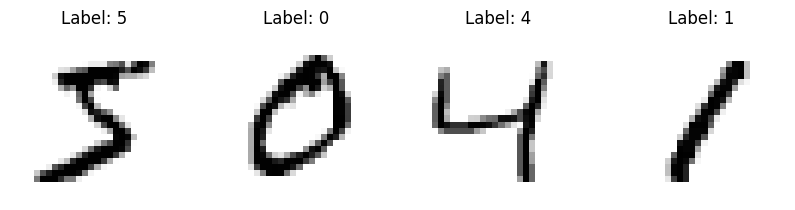

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.83      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.82      0.81       974
           9       0.81      0.86      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy: 0.8665


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics, naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Download và load dữ liệu MNIST
import gzip, struct

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num, rows*cols)
        return images

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

# Bạn cần download 4 file từ repo / link mirror:
#   train-images-idx3-ubyte.gz
#   train-labels-idx1-ubyte.gz
#   t10k-images-idx3-ubyte.gz
#   t10k-labels-idx1-ubyte.gz
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test  = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test  = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# 2) Ví dụ hiển thị 4 mẫu đầu tiên
plt.figure(figsize=(10,3))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# 3) Tiền xử lý — chuẩn hóa nếu cần
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled  = scaler.transform(X_test.astype(np.float64))

# 4) Huấn luyện mô hình (ví dụ: cây quyết định)
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X_train_scaled, y_train)

# 5) Dự đoán & đánh giá
y_pred = clf.predict(X_test_scaled)
print("Classification report:")
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



Classification report for classifier DecisionTreeClassifier(max_depth=10):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.83      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.82      0.81       974
           9       0.81      0.86      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000


Confusion matrix:
[[ 912    0   10    9    6   13    9    5   13    3]
 [   1 1089   12   13    2    5    2    1   10    0]
 [  12   12  867   19   21   10    9   35

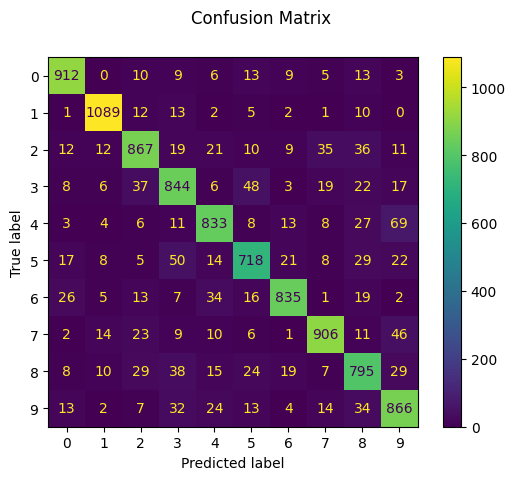

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# In báo cáo phân loại
print(
    "Classification report for classifier %s:\n%s\n"
    % (clf, metrics.classification_report(y_test, y_pred))
)

# Vẽ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test)
disp.figure_.suptitle("Confusion Matrix")

# In ma trận nhầm lẫn dạng text
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [ ]:
!pip install pillow
from PIL import Image, ImageOps
import numpy as np


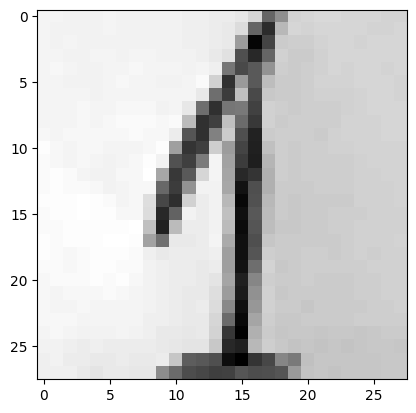

In [ ]:
# Open image
img = Image.open('test_image_Bai7(1).jpg').convert("L").resize((28, 28))

# Invert image (đen ↔ trắng)
img = ImageOps.invert(img)

# Convert to numpy array
im2arr = np.array(img)

# Show image
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:

# Chuyển từ 2D array (28×28) thành 1D array (1×784)
img1d = im2arr.reshape([1, 784])

# Giữ nguyên giá trị pixel 0-255, vì classifier được huấn luyện trên dữ liệu MNIST unscaled
# Nếu muốn chuẩn hóa, cần sử dụng scaler đã dùng cho dữ liệu huấn luyện
# Ví dụ: img1d = scaler.transform(img1d.astype(np.float64)) nếu classifier được train trên X_train_scaled

img1d

array([[ 79,  79,  80,  80,  80,  79,  80,  80,  80,  80,  80,  81,  81,
         82,  82,  84,  90, 131, 116,  91,  90,  89,  89,  90,  90,  90,
         91,  91,  79,  80,  80,  80,  80,  79,  80,  80,  80,  80,  80,
         81,  81,  82,  83,  88, 131, 152, 101,  90,  91,  90,  90,  90,
         90,  91,  91,  90,  79,  80,  79,  80,  80,  80,  80,  80,  80,
         80,  80,  81,  81,  82,  83, 111, 166, 143,  94,  93,  93,  91,
         90,  90,  91,  90,  90,  90,  79,  79,  80,  80,  79,  79,  80,
         79,  79,  80,  80,  80,  81,  83,  86, 139, 153, 131,  92,  94,
         94,  92,  90,  90,  90,  90,  90,  90,  79,  78,  79,  80,  80,
         79,  79,  78,  79,  79,  79,  80,  79,  81, 125, 141, 135, 114,
         93,  94,  93,  92,  90,  91,  90,  90,  91,  90,  79,  79,  80,
         80,  80,  79,  78,  79,  79,  80,  80,  79,  77,  92, 150, 112,
        135,  99,  94,  94,  93,  91,  91,  91,  90,  90,  90,  91,  79,
         79,  79,  79,  80,  79,  79,  79,  79,  79

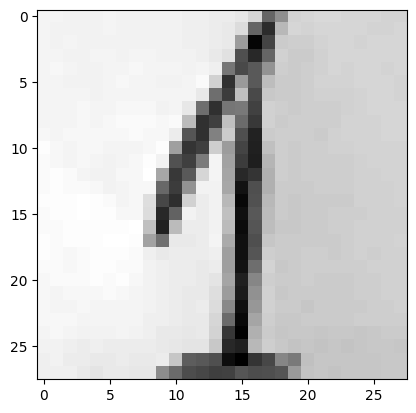

In [ ]:

# Hiển thị ảnh sau normalize
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
